## 3.1 Importing data

In [144]:
library(readr)
library(rsample)
library(MASS)
setwd("C:/Users/chaof/Desktop/CS/CS6440/Assignments/MP4")
dataRaw <- read_csv(file = 'Exasens.csv')


Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X10' [10], 'X11' [11], 'X12' [12], 'X13' [13]"Parsed with column specification:
cols(
  Diagnosis = col_character(),
  ID = col_character(),
  `Imaginary Part` = col_character(),
  X4 = col_character(),
  `Real Part` = col_character(),
  X6 = col_character(),
  Gender = col_double(),
  Age = col_double(),
  Smoking = col_double(),
  X10 = col_logical(),
  X11 = col_logical(),
  X12 = col_character(),
  X13 = col_character()
)


## 3.2 Descriptive analysis of the data

### 3.2.1 Feature highlight
According to the data source, the data table contains the following attributes: 

1- Diagnosis (COPD-HC-Asthma-Infected)
2- ID
3- Age
4- Gender (1=male, 0=female)
5- Smoking Status (1=Non-smoker, 2=Ex-smoker, 3=Active-smoker)
6- Saliva Permittivity:
a) Imaginary part (Min=Absolute minimum value, Avg=Average)
b) Real part (Min, Avg)

**In my study, the target feature is "Diagnosis", and two sets of input features were examined - one set containing both demographic info. (Gender, Age, and Smoking status) and permittivity values (Imaginary and Real parts) whereas a second set only containing the demographic info.**   

In [145]:
head(dataRaw)

# removing unneeded columns
dataRaw <- dataRaw[c(-(10:13))]

head(dataRaw) 

Diagnosis,ID,Imaginary Part,X4,Real Part,X6,Gender,Age,Smoking,X10,X11,X12,X13
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Min,Avg.,Min,Avg.,NA,NA,NA,NA,NA,Gender,Somking
COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1,77,2,NA,NA,Male=1,Non-smoker=1
COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0,72,2,NA,NA,Female=0,Ex-smoker=2
COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1,73,3,NA,NA,NA,Active-smoker=3
COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1,76,2,NA,NA,NA,NA


Diagnosis,ID,Imaginary Part,X4,Real Part,X6,Gender,Age,Smoking
NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Min,Avg.,Min,Avg.,NA,NA,NA
COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1,77,2
COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0,72,2
COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1,73,3
COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1,76,2


### 3.2.2 Subsetting and characterizing data
As below shows, dataset1 is created so that 1) only "COPD" and "HC" are the target values and 2) both demographic and permitivity values are used as input features. This creates a dataset of 80 points without any missing values. Some conversion of feature data type was done. 

dataset2 is created so that 1) only "COPD" and "HC" are the target values and 2) only demographic info. is used as input features. This creates a dataset of 239 points without any missing values. 

In [146]:
# define dataset1 with both demographic and permittivity values, for COPD and HC groups only (80 samples)
dataSet1 <- dataRaw[c(-2)]
dataSet1 <- subset(dataSet1, (dataSet1$Diagnosis == "COPD" | dataSet1$Diagnosis =="HC") & (dataSet1$'Imaginary Part' != '<NA>'))
colnames(dataSet1) <- c("Diagnosis", "Imaginary_min", "Imaginary_avg", "Real_min", "Real_avg", "Gender", "Age", "Smoking")
head(dataSet1)
str(dataSet1)

# convert to the correct data types
dataSet1$Imaginary_min <- as.numeric(dataSet1$Imaginary_min)
dataSet1$Imaginary_avg <- as.numeric(dataSet1$Imaginary_avg)
dataSet1$Real_min <- as.numeric(dataSet1$Real_min)
dataSet1$Real_avg <- as.numeric(dataSet1$Real_avg)
str(dataSet1)


Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
COPD,-320.61,-300.5635307,-495.26,-464.1719907,1,77,2
COPD,-325.39,-314.7503595,-473.73,-469.2631404,0,72,2
COPD,-323,-317.4360556,-476.12,-471.8976667,1,73,3
COPD,-327.78,-317.3996698,-473.73,-468.856388,1,76,2
COPD,-325.39,-316.1557853,-478.52,-472.8697828,0,65,2
COPD,-327.78,-318.6775535,-507.23,-469.0241943,1,60,2


Classes 'tbl_df', 'tbl' and 'data.frame':	80 obs. of  8 variables:
 $ Diagnosis    : chr  "COPD" "COPD" "COPD" "COPD" ...
 $ Imaginary_min: chr  "-320.61" "-325.39" "-323" "-327.78" ...
 $ Imaginary_avg: chr  "-300.5635307" "-314.7503595" "-317.4360556" "-317.3996698" ...
 $ Real_min     : chr  "-495.26" "-473.73" "-476.12" "-473.73" ...
 $ Real_avg     : chr  "-464.1719907" "-469.2631404" "-471.8976667" "-468.856388" ...
 $ Gender       : num  1 0 1 1 0 1 1 1 1 1 ...
 $ Age          : num  77 72 73 76 65 60 76 74 67 65 ...
 $ Smoking      : num  2 2 3 2 2 2 2 2 2 2 ...
Classes 'tbl_df', 'tbl' and 'data.frame':	80 obs. of  8 variables:
 $ Diagnosis    : chr  "COPD" "COPD" "COPD" "COPD" ...
 $ Imaginary_min: num  -321 -325 -323 -328 -325 ...
 $ Imaginary_avg: num  -301 -315 -317 -317 -316 ...
 $ Real_min     : num  -495 -474 -476 -474 -479 ...
 $ Real_avg     : num  -464 -469 -472 -469 -473 ...
 $ Gender       : num  1 0 1 1 0 1 1 1 1 1 ...
 $ Age          : num  77 72 73 76 65 60 76 74

In [147]:
# define dataset2 with only demographic info., for COPD and HC groups only (239 samples)
dataSet2 <- dataRaw[c(-(2:6))]
head(dataSet2)
dataSet2 <- subset(dataSet2, dataRaw$Diagnosis == "COPD" | dataRaw$Diagnosis =="HC")
summary(dataSet2)

Diagnosis,Gender,Age,Smoking
NA,NA,NA,NA
NA,NA,NA,NA
COPD,1,77,2
COPD,0,72,2
COPD,1,73,3
COPD,1,76,2


  Diagnosis             Gender            Age           Smoking     
 Length:239         Min.   :0.0000   Min.   :17.00   Min.   :1.000  
 Class :character   1st Qu.:0.0000   1st Qu.:32.50   1st Qu.:1.000  
 Mode  :character   Median :0.0000   Median :50.00   Median :2.000  
                    Mean   :0.4686   Mean   :49.86   Mean   :1.762  
                    3rd Qu.:1.0000   3rd Qu.:66.50   3rd Qu.:2.000  
                    Max.   :1.0000   Max.   :93.00   Max.   :3.000  

## 3.3 Data cleaning and modeling
### 3.3.1 Modeling with both demographic and permittivity features 

In [148]:
# modeling dataSet1
# classification model using regression

# Convert to classfication values: HC to "0" and COPD to "1"
dataSet1$Diagnosis[dataSet1$Diagnosis== 'HC'] <- 0
dataSet1$Diagnosis[dataSet1$Diagnosis== 'COPD'] <- 1
# convert the Diagnosis column to numeric 
dataSet1$Diagnosis <- as.numeric(dataSet1$Diagnosis)
head(dataSet1)
str(dataSet1)

# check the distribution of responses: 40 '0' (HC) and 40 '1' (COPD)
table(dataSet1$Diagnosis) 

# Set the seed to produce reproducible results as random sampling is done in the next step
set.seed(456)

# divide the data into 75% for training and 25% for testing
split_strat  <- initial_split(dataSet1, prop = 0.75, strata = "Diagnosis")
dataSet1.learn  <- training(split_strat)
dataSet1.test   <- testing(split_strat)
table(dataSet1.learn$Diagnosis)  # 30 "0"s (HC) and 30 "1"s (COPD)
table(dataSet1.test$Diagnosis)   # 10 "0"s (HC) and 10 "1"s (COPD)

Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
1,-320.61,-300.5635,-495.26,-464.1720,1,77,2
1,-325.39,-314.7504,-473.73,-469.2631,0,72,2
1,-323.00,-317.4361,-476.12,-471.8977,1,73,3
1,-327.78,-317.3997,-473.73,-468.8564,1,76,2
1,-325.39,-316.1558,-478.52,-472.8698,0,65,2
1,-327.78,-318.6776,-507.23,-469.0242,1,60,2


Classes 'tbl_df', 'tbl' and 'data.frame':	80 obs. of  8 variables:
 $ Diagnosis    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Imaginary_min: num  -321 -325 -323 -328 -325 ...
 $ Imaginary_avg: num  -301 -315 -317 -317 -316 ...
 $ Real_min     : num  -495 -474 -476 -474 -479 ...
 $ Real_avg     : num  -464 -469 -472 -469 -473 ...
 $ Gender       : num  1 0 1 1 0 1 1 1 1 1 ...
 $ Age          : num  77 72 73 76 65 60 76 74 67 65 ...
 $ Smoking      : num  2 2 3 2 2 2 2 2 2 2 ...



 0  1 
40 40 


 0  1 
30 30 


 0  1 
10 10 

In [149]:
# model #1: linear regression
model1.1 <- lm (Diagnosis~ ., data = dataSet1.learn)
summary(model1.1)


Call:
lm(formula = Diagnosis ~ ., data = dataSet1.learn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56518 -0.12665  0.03239  0.15716  0.54742 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.365538   1.483311   0.246   0.8063    
Imaginary_min -0.012516   0.008234  -1.520   0.1345    
Imaginary_avg  0.011868   0.008898   1.334   0.1881    
Real_min       0.004070   0.001961   2.075   0.0429 *  
Real_avg      -0.001223   0.003769  -0.324   0.7469    
Gender         0.118566   0.075876   1.563   0.1242    
Age            0.021486   0.001991  10.792 7.01e-15 ***
Smoking       -0.043866   0.063684  -0.689   0.4940    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2592 on 52 degrees of freedom
Multiple R-squared:  0.7671,	Adjusted R-squared:  0.7358 
F-statistic: 24.47 on 7 and 52 DF,  p-value: 2.265e-14


Noticing the order of magnitude differences among the values of the coefficients (estimates), data standardization was conducted in the following section before modeling again ("model1.2").

In [150]:
# data standardization to a mean of zero and a standard deviation of one:
dataSet1.learnStd <- dataSet1.learn
dataSet1.learnStd$Imaginary_min <- (dataSet1.learn$Imaginary_min - mean(dataSet1.learn$Imaginary_min))/sd(dataSet1.learn$Imaginary_min)
dataSet1.learnStd$Imaginary_avg <- (dataSet1.learn$Imaginary_avg - mean(dataSet1.learn$Imaginary_avg))/sd(dataSet1.learn$Imaginary_avg)
dataSet1.learnStd$Real_min <- (dataSet1.learn$Real_min - mean(dataSet1.learn$Real_min)) / sd(dataSet1.learn$Real_min)
dataSet1.learnStd$Real_avg <- (dataSet1.learn$Real_avg - mean(dataSet1.learn$Real_avg)) / sd(dataSet1.learn$Real_avg)
dataSet1.learnStd$Gender <- (dataSet1.learn$Gender - mean(dataSet1.learn$Gender)) / sd(dataSet1.learn$Gender)
dataSet1.learnStd$Age <- (dataSet1.learn$Age - mean(dataSet1.learn$Age)) / sd(dataSet1.learn$Age)
dataSet1.learnStd$Smoking <- (dataSet1.learn$Smoking - mean(dataSet1.learn$Smoking)) / sd(dataSet1.learn$Smoking)

# checking the results of standardization 
colMeans (dataSet1.learnStd)
apply(dataSet1.learnStd, 2, sd)

# re-run lm function:
model1.2 <- lm (Diagnosis~ ., data = dataSet1.learnStd)
summary(model1.2)

Diagnosis Imaginary_min Imaginary_avg      Real_min      Real_avg 
 5.000000e-01 -5.340635e-16  1.913400e-16  1.040834e-16  9.539244e-16 
       Gender           Age       Smoking 
 1.110223e-16 -9.846363e-17  1.406282e-16

Diagnosis Imaginary_min Imaginary_avg      Real_min      Real_avg 
    0.5042195     1.0000000     1.0000000     1.0000000     1.0000000 
       Gender           Age       Smoking 
    1.0000000     1.0000000     1.0000000


Call:
lm(formula = Diagnosis ~ ., data = dataSet1.learnStd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56518 -0.12665  0.03239  0.15716  0.54742 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.50000    0.03346  14.944  < 2e-16 ***
Imaginary_min -0.33030    0.21729  -1.520   0.1345    
Imaginary_avg  0.28757    0.21560   1.334   0.1881    
Real_min       0.10933    0.05269   2.075   0.0429 *  
Real_avg      -0.01466    0.04518  -0.324   0.7469    
Gender         0.05479    0.03506   1.563   0.1242    
Age            0.43007    0.03985  10.792 7.01e-15 ***
Smoking       -0.02817    0.04090  -0.689   0.4940    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2592 on 52 degrees of freedom
Multiple R-squared:  0.7671,	Adjusted R-squared:  0.7358 
F-statistic: 24.47 on 7 and 52 DF,  p-value: 2.265e-14


The results of "model1.2" shows that only two features/attributes are statistically significant for discriminating people with COPD vs. healthy people: the minimum value of the real part of the permittivity and the age. This is consistent with the indications from observations in Figure 2 and Figure 4 of the study (Zarrin, Roeckendorf, & Wenger, 2020). Re-fit the data with only thses two features, as "model1.3" shows below. 

In [151]:
model1.3 <- lm (Diagnosis ~ Real_min + Age, data = dataSet1.learnStd)
summary(model1.3)


Call:
lm(formula = Diagnosis ~ Real_min + Age, data = dataSet1.learnStd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65596 -0.14977  0.05649  0.15514  0.51200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.50000    0.03378  14.800   <2e-16 ***
Real_min     0.04001    0.03427   1.167    0.248    
Age          0.42751    0.03427  12.474   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2617 on 57 degrees of freedom
Multiple R-squared:  0.7398,	Adjusted R-squared:  0.7307 
F-statistic: 81.03 on 2 and 57 DF,  p-value: < 2.2e-16


**model1.3 is selected for further evaluation on performance in Section 4.**

### 3.3.2 Modeling with just demographic features

In [152]:
# modeling dataSet2
# Classification model using regression

# Convert to classfication values: HC to "0" and COPD to "1"
dataSet2$Diagnosis[dataSet2$Diagnosis== 'HC'] <- 0
dataSet2$Diagnosis[dataSet2$Diagnosis== 'COPD'] <- 1
# convert the Diagnosis column to numeric 
dataSet2$Diagnosis <- as.numeric(dataSet2$Diagnosis)
head(dataSet2)
str(dataSet2)

# check the distribution of responses: 160 '0' (HC) and 79 '1' (COPD)
table(dataSet2$Diagnosis) 

# Set the seed to produce reproducible results as random sampling is done in the next step
set.seed(123)

# divide the data into 75% for training and 25% for testing
split_strat  <- initial_split(dataSet2, prop = 0.75, strata = "Diagnosis")
dataSet2.learn  <- training(split_strat)
dataSet2.test   <- testing(split_strat)
table(dataSet2.learn$Diagnosis)  # 120 "0"s (HC) and 60 "1"s (COPD)
table(dataSet2.test$Diagnosis)   # 40 "0"s (HC) and 19 "1"s (COPD)

Diagnosis,Gender,Age,Smoking
1,1,77,2
1,0,72,2
1,1,73,3
1,1,76,2
1,0,65,2
1,1,60,2


Classes 'tbl_df', 'tbl' and 'data.frame':	239 obs. of  4 variables:
 $ Diagnosis: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender   : num  1 0 1 1 0 1 1 1 1 1 ...
 $ Age      : num  77 72 73 76 65 60 76 77 74 67 ...
 $ Smoking  : num  2 2 3 2 2 2 2 2 2 2 ...



  0   1 
160  79 


  0   1 
120  60 


 0  1 
40 19 

In [153]:
# model #1: linear regression
model2.1 <- lm (Diagnosis~ ., data = dataSet2.learn)
summary(model2.1)


Call:
lm(formula = Diagnosis ~ ., data = dataSet2.learn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68037 -0.21696  0.07439  0.20846  0.71739 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.719518   0.071754 -10.028   <2e-16 ***
Gender       0.099568   0.045159   2.205   0.0288 *  
Age          0.017798   0.001202  14.802   <2e-16 ***
Smoking      0.065001   0.030632   2.122   0.0352 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.289 on 176 degrees of freedom
Multiple R-squared:  0.6326,	Adjusted R-squared:  0.6263 
F-statistic:   101 on 3 and 176 DF,  p-value: < 2.2e-16


**model2.1 shows that all three demographic features, gender, age, and smoking status are statistically significant for the diagnosis of COPD.** 

In [154]:
# model #2.2: logistic regression

model2.2 <- glm (Diagnosis~ ., family = binomial(link="logit"), data = dataSet2.learn)
summary(model2.2)


Call:
glm(formula = Diagnosis ~ ., family = binomial(link = "logit"), 
    data = dataSet2.learn)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.36988  -0.09044  -0.00314   0.09724   2.89442  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -23.56566    4.47178  -5.270 1.37e-07 ***
Gender        0.40471    0.76044   0.532   0.5946    
Age           0.32902    0.06397   5.143 2.70e-07 ***
Smoking       1.63504    0.57703   2.834   0.0046 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 229.145  on 179  degrees of freedom
Residual deviance:  48.618  on 176  degrees of freedom
AIC: 56.618

Number of Fisher Scoring iterations: 8


model2.2 shows that gender is not significant, whereas age and smoking status are important in discriminating people with COPD vs. healthy people. 

In [155]:
# model2.2 shows that gender is not significant, so try lm fitting but with just age and smoking

model2.3 <- lm (Diagnosis ~ Age + Smoking, dataSet2.learn)
summary(model2.3)


Call:
lm(formula = Diagnosis ~ Age + Smoking, data = dataSet2.learn)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7407 -0.2296  0.1103  0.2045  0.6721 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.714949   0.072503  -9.861   <2e-16 ***
Age          0.018500   0.001172  15.782   <2e-16 ***
Smoking      0.068181   0.030930   2.204   0.0288 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2921 on 177 degrees of freedom
Multiple R-squared:  0.6224,	Adjusted R-squared:  0.6182 
F-statistic: 145.9 on 2 and 177 DF,  p-value: < 2.2e-16


The above results did not show improved fitting (in fact, adjusted R^2 is slightly lower than that of model1). **Therefore, model2.1 is selected for further evaluation on performance in Section 4.** 

## 3.4 Performance estimation
### 3.4.1 Modeling with both demographic and permittivity features 

Diagnosis,Imaginary_min,Imaginary_avg,Real_min,Real_avg,Gender,Age,Smoking
1,-325.39,-316.1558,-478.52,-472.8698,0,65,2
1,-320.61,-307.5996,-476.12,-470.1816,1,74,2
1,-313.43,-299.0552,-521.58,-421.1894,1,75,2
1,-311.04,-297.9901,-466.55,-428.9504,0,65,2
1,-323.00,-293.0288,-466.55,-431.9907,1,93,2
1,-228.00,-228.0000,-442.00,-442.0000,1,75,2


Diagnosis     Real_min          Age 
 0.500000000  1.053214534 -0.003330658

Diagnosis  Real_min       Age 
0.5129892 3.6528162 1.0938334

[1] 0.8421053
Confusion Matrix and Statistics

         Actual
predicted 0 1
        0 8 1
        1 2 9
                                          
               Accuracy : 0.85            
                 95% CI : (0.6211, 0.9679)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.001288        
                                          
                  Kappa : 0.7             
                                          
 Mcnemar's Test P-Value : 1.000000        
                                          
            Sensitivity : 0.8000          
            Specificity : 0.9000          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.8182          
             Prevalence : 0.5000          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.4500          
      Balanced Accuracy : 0.8500          
                                          
       'Positive' Class : 0               
                                   

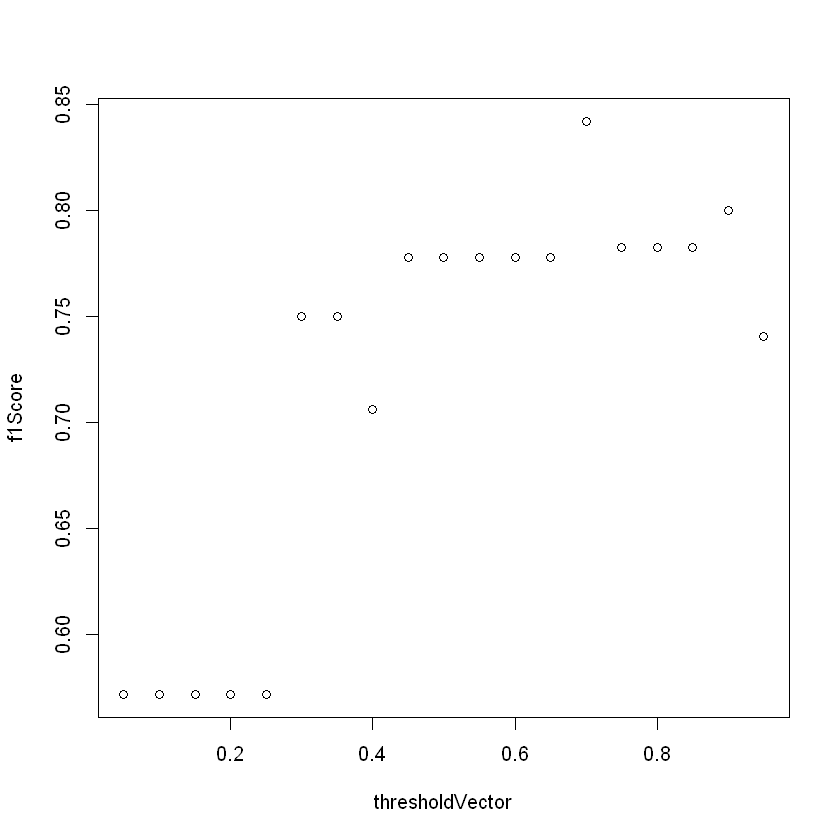

In [156]:
library(caret)
# first, process the Real_min and Age features of the test dataset.
head(dataSet1.test)
dataSet1.testStd <- dataSet1.test[c(1,4,7)]
dataSet1.testStd$Diagnosis <- dataSet1.test$Diagnosis
dataSet1.testStd$Real_min <- (dataSet1.test$Real_min - mean(dataSet1.learn$Real_min))/sd(dataSet1.learn$Real_min)
dataSet1.testStd$Age <- (dataSet1.test$Age - mean(dataSet1.learn$Age))/sd(dataSet1.learn$Age)
colMeans(dataSet1.testStd)
apply(dataSet1.testStd, 2, sd)

test.pred <- predict(model1.3, dataSet1.testStd)

# testing output with multiple threshold values and find the best 
thresholdVector <- 0.05*seq(1,19)
f1Score <- 0*thresholdVector
idx <- 1
for (thresholdProb in thresholdVector) {
    pred <- ifelse(test.pred > thresholdProb, "1", "0")
    confusionTb <- confusionMatrix(as.factor(pred), as.factor(dataSet1.testStd$Diagnosis), dnn = c("predicted", "Actual"))
    f1Score[idx] <- confusionTb$byClass['F1']
    idx <- idx +1
}
plot(thresholdVector, f1Score)
print(max(f1Score))            # probability thresold = 0.7 gives the highest F1 Score of 0.84

# print out the confusion matrix for when probability threshold = 0.7
predMax <- ifelse(test.pred > 0.7, "1", "0")
confusionTbMax <- confusionMatrix(as.factor(predMax), as.factor(dataSet1.testStd$Diagnosis), dnn = c("predicted", "Actual"))
print(confusionTbMax)
print(confusionTbMax$byClass['F1'])

### 3.4.2 Modelling with just demographic features

[1] 0.952381
Confusion Matrix and Statistics

         Actual
predicted  0  1
        0 40  4
        1  0 15
                                          
               Accuracy : 0.9322          
                 95% CI : (0.8354, 0.9812)
    No Information Rate : 0.678           
    P-Value [Acc > NIR] : 2.977e-06       
                                          
                  Kappa : 0.8357          
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.7895          
         Pos Pred Value : 0.9091          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6780          
         Detection Rate : 0.6780          
   Detection Prevalence : 0.7458          
      Balanced Accuracy : 0.8947          
                                          
       'Positive' Class : 0               
                              

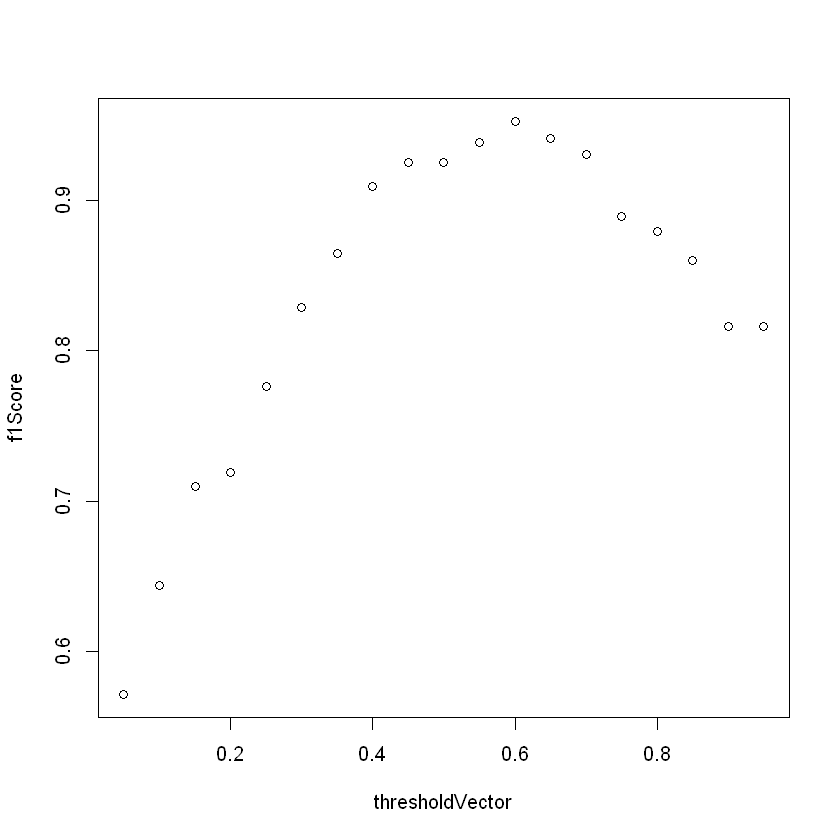

In [157]:
library(caret)
test.pred <- predict(model2.1, dataSet2.test)

# testing output with multiple threshold values and find the best 

thresholdVector <- 0.05*seq(1,19)
f1Score <- 0*thresholdVector
idx <- 1
for (thresholdProb in thresholdVector) {
    pred <- ifelse(test.pred > thresholdProb, "1", "0")
    confusionTb <- confusionMatrix(as.factor(pred), as.factor(dataSet2.test$Diagnosis), dnn = c("predicted", "Actual"))
    f1Score[idx] <- confusionTb$byClass['F1']
    idx <- idx +1
}
plot(thresholdVector, f1Score)
print(max(f1Score))   # probability thresold = 0.6 gives the highest F1 Score of 0.95

# print out the confusion matrix for when probability threshold = 0.6
predMax <- ifelse(test.pred > 0.6, "1", "0")
confusionTbMax <- confusionMatrix(as.factor(predMax), as.factor(dataSet2.test$Diagnosis), dnn = c("predicted", "Actual"))
print(confusionTbMax)
print(confusionTbMax$byClass['F1'])

### 3.4.3 Comparison of the two models
As illustrated above, the best threshold value for each model was identified to be 0.7 for model1.3 and 0.6 for model2.1 respectively, which give a F1 Score of 0.84 and 0.95 respectively. With better performance and ease of data collection, model2.1, modeling with just demographic infomration, including gender, age, and smoking status of the patient, was chosen as the final solution. 

**The final equation for predicting whether one has COPD or not is: 
Probability = -0.719518 + 0.099568 * Gender + 0.017798 * Age + 0.065001 * Smoking, where
Gender = "1" for Male and "0" for Female,
Smoking = "1" for non-smoker, "2" for ex-smoker, and "3" for active-smoker.
Use 0.6 as the threshold probability value, i.e., If probability >= 0.6, the subject is predicted to have COPD, otherwise, non-COPD.**  